# Práctica 3: Modelo dinámico inverso de un robot y planteamiento de trayectoria

## Objetivo

Que el alumno resuelva la dinámica inversa de un manipulador serial, calculando el par necesario para desplazar el efector final de un punto inicial a un punto final a lo largo de una trayectoria lineal.


### Metas 

- Que el alumno aplique un modelo cinemático inverso para calcular una trayectoria a partir de una posición actual hacia una posición final
- Que el alumno aplique un modelo de dinámica inversa a través del método de Euler Lagrange para calcular los pares en las juntas del robot
- Que el alumno grafique y analice los resultados del modelo
- Que el alumno configure un repositorio en línea e incluya en éste su práctica

### Contribución al perfil del egresado

La siguiente práctica contribuye en los siguientes puntos al perfil del egresado:

#### Aptitudes y habilidades

- Para modelar, simular e interpretar el comportamiento de los sistemas mecatrónicos.
- Para diseñar, construir, operar y mantener los sistemas mecatrónicos y sus componentes.

#### Actitudes

- Tener confianza en su preparación académica.
- Comprometido con su actualización, superación y competencia profesional.

#### De tipo social

- Promover el cambio en la mentalidad frente a la competitividad internacional.

## Rúbrica de evaluación

La evaluación de la práctica contará de los siguientes puntos y se evaluará con los siguientes criterios:

| Elemento | Porcentaje |
|------| -----------:|
| **Cuestionario previo** | 15% | 
| **Desarrollo** | 35% |
| **Análisis de resultados**  | 35% |
| **Conclusiones** | 15% |

<br>

| Elemento | Malo | Regular | Bueno |
| :------| ------ | --------| ------|
| **Cuestionario previo** | El trabajo no contiene cuestionario previo o todas las preguntas son incorrectas (0%)| Al menos la mitad de las preguntas son correctas (8%) |  Todas las preguntas son correctas (15%) |
| **Desarrollo** | El trabajo no contiene desarrollo o su planteamiento no concuerda con lo deseado (0%) | El desarrollo está mal planteado o no llega a los resultados esperados (10%) | El desarrollo tiene un planteamiento adecuado y llega a los resultados esperados (35%) |
| **Análisis de resultados**  | El trabajo no contiene análisis de resultados o la información no se está interpretando correctamente (0%) | La interpretación de los resultados es parcial o desorganizada (10%) | Realiza un correcto análisis de los resultados de forma organizada   (35%) |
| **Conclusiones** | El trabajo no contiene conclusiones o no hacen referencia al trabajo desarrollado y los objetivos planteados (0%) | La redacción de las conclusiones es desorganizada o confusa (8%) | Las conclusiones del trabajo son claras y hacen referencia al trabajo desarrollado y los objetivos planteados (15%) | 



## Introducción

### Modelo dinámico
El modelo dinámico de un sistema permite analizar el movimiento del cuerpo atendiendo a las causas que lo originan (fuerzas y pares)
En particular, para un manipulador serial, permite relacionar el par aplicado en las juntas de un robot con la posición del efector final, considerando fenómenos como la masa y la inercia.

### Modelo dinámico inverso
El modelo dinámico inverso permite conocer la posición del efector final en términos de los pares de las juntas. Para esto, se pueden tomar dos aproximaciones

### Ecuaciones de propagación
Las ecuaciones de propagación de velocidad permiten relacionar cómo el comportamiento de un eslabón dentro de una cadena cinemática afecta a los otros eslabones dentro de la cadena. Se puede analizar la propagación de las fuerzas y de la velocidad dentro de una cadena.

### Modelo Newton-Euler
Las ecuaciones de Newton-Euler relacionan la cantidad de movimiento lineal y angular con las fuerzas y pares a los que es sometido cada uno de los eslabones

### Modelo Euler-Lagrange
El modelo de Euler-Lagrange permite relacionar la energía cinética y potencial con las perturbaciones dentro de un sistema, a través del principio de mínima acción. 

## Cuestionario previo

Responder de forma breve las siguientes preguntas:

- ¿Qué es el análisis de dinámica inversa y qué nos permite obtener?
> Conociendo la trayectoria del efector final, con las velocidades y aceleraciones de las juntas de los eslabones, y las fuerzas externas aplicadas, se determinan el par torsional necesario para que cada eslabón se mueva como se desea:
>
> Fuerzas y Momentos en las juntas
> 
> Potencia requerida para los actuadores 
- ¿A través de qué modelados se puede realizar un análisis de dinámica inversa?
> Se necesitan los modelos de:
>
> · Cinemática Inversa
>
> · Generación de Trayectoria
>
> · Inercia y esfuerzos
- ¿De qué condiciones ó fenómenos físicos dependen los pares en las juntas de un robot para seguir una trayectoria?
> Dependen de:
>
> · Gravedad
>
> · Posición inicial de los eslabones
>
> · Velocidades y aceleraciones de las juntas
>
> · Masa de los eslabones: Euler - Lagrange
- ¿Cómo se aplica la derivada total de una función que está en términos de otras variables que a su vez están en términos de la variable respecto a la que se realiza la derivada total?
> Por el metodo de la cadena
> 

En caso de integrar imagenes, colocarlas en la carpeta *"imagenes"*

## Desarrollo

### 1. Planteamiento de la cinemática inversa y obtención de la trayectoria
En esta primera parte, se realiza el análisis de la cinemática inversa, que permite obtener las posiciones, velocidades y aceleraciones de las juntas del robot, dada **una posición inicial de las juntas y una posición final del efector final**. Se puede retomar de la práctica anterior. 
Un diagrama del robot se muestra en la imagen:

<img src="imagenes/P3_IM1.png" alt = "Robot RRR" width="300" height="300" display= "block"/>

** Considerar valores cualesquiera para las dimensiones de los eslabones y la posición inicial de las juntas

### 1.1 Se plantea la Generación de Trayectoria mediante la Cinematica Directa:

Para llegar a la cinematica inversa se necesita la cinematica directa y a su vez la matriz de transformación homogénea:

In [1]:
#!/usr/bin/env python3 
from sympy import *
import matplotlib
import matplotlib.pyplot as plt

class GeneradorDinamica():
    def __init__(self, dim = (0.7, 0.5, 0.3)):
        self.dim = dim
    def trans_homo(self, x, y, z, gamma, beta, alpha):
        R_z = Matrix([ [cos(alpha), -sin(alpha), 0], [sin(alpha), cos(alpha), 0],[0, 0, 1]])
        R_y = Matrix([ [cos(beta), 0, -sin(beta)], [0, 1, 0],[sin(beta), 0, cos(beta)]])
        R_x = Matrix([ [1, 0, 0], [0, cos(gamma), -sin(gamma)],[0, sin(gamma), cos(gamma)]])
        R = R_x * R_y *R_z
        p = Matrix([[x],[y],[z]])
        T = Matrix.vstack(Matrix.hstack(R, p), Matrix([[0,0,0,1]]))
        return T 

In [2]:
def cinematica_directa(self):
        print("Generando cinematica directa")
        self.theta_0_1, self.theta_1_2, self.theta_2_3 = symbols("theta_0_1 theta_1_2 theta_2_3")
        #Matrices de transformación
        self.T_0_1 = self.trans_homo(0, 0, 0, pi/2, 0, self.theta_0_1)
        self.T_1_2 = self.trans_homo(self.dim[0], 0, 0, 0, 0, self.theta_1_2)
        self.T_2_3 = self.trans_homo(self.dim[1], 0, 0, 0, 0, self.theta_2_3)
        self.T_3_P = self.trans_homo(self.dim[2], 0, 0, 0, 0, 0)
        self.T_0_P = simplify(self.T_0_1 * self.T_1_2 * self.T_2_3 * self.T_3_P)
        #Vector de postura xi = [x z th]
        self.xi_0_P = Matrix([[self.T_0_P[0, 3]],
                                [self.T_0_P[2, 3]],
                                [self.theta_0_1 + self.theta_1_2 + self.theta_2_3]])

GeneradorDinamica.cinematica_directa = cinematica_directa

## 1.2 Se plantea la Trayectoria:

Se planteá el código que permita definir los puntos intermedios de una trayectoria, la cual debe tener velocidades y aceleraciones nulas al inicio y al final; con una tasa de muestreo de 30 muestras por segundo. 

In [3]:
def generar_trayectoria(self, q_in = (pi/4, pi/8, pi/8), xi_fn = (0.5, 0.7, 0), tie = (0, 2), frec = 15):
    print("Creando trayectoria")
    #Variables para polinomio lambda
    self.t, self.a_0, self.a_1, self.a_2, self.a_3, self.a_4, self.a_5 = symbols(
    "t a_0 a_1 a_2 a_3 a_4 a_5")
    #Polinomio lambda lam = a0 + a1t + a2t^2 + a3t^3 + a4t^4 + a5t^5
    self.lam = self.a_0 + self.a_1 * self.t + self.a_2 * (self.t)**2 + self.a_3 * (self.t)**3 + self.a_4 * (self.t)**4+ self.a_5 * (self.t)**5
    #Primera y segunda derivada de lambda
    self.lam_dot = diff(self.lam, self.t)
    self.lam_dot_dot = diff(self.lam_dot, self.t)
    # Cálculo de parámetros de lambda. 
    # Planteando ecuaciones igualadas a cero
    # lam(t=ti) = 0
    # lam(t=tf) = 1   ==>  lam(t=tf) -1 = 0
    # lam'(t=ti) = 0
    # lam'(t=tf) = 0
    # lam''(t=ti) = 0
    # lam''(t=tf) = 0
    ec_1 = self.lam.subs(self.t, tie[0])
    ec_2 = self.lam.subs(self.t, tie[1]) - 1
    ec_3 = self.lam_dot.subs(self.t, tie[0])
    ec_4 = self.lam_dot.subs(self.t, tie[1])
    ec_5 = self.lam_dot_dot.subs(self.t, tie[0])
    ec_6 = self.lam_dot_dot.subs(self.t, tie[1])
    # Resolviendo sistema para las variables a0-a5
    terminos = solve([ec_1, ec_2, ec_3, ec_4, ec_5, ec_6], [self.a_0, self.a_1, self.a_2, self.a_3, self.a_4, self.a_5], dict = True)
    # Tomando la primera solución devuelta y sustituyéndola en el polinomio
    self.lam_s          = self.lam.subs(terminos[0])
    self.lam_dot_s      = self.lam_dot.subs(terminos[0])
    self.lam_dot_dot_s  = self.lam_dot_dot.subs(terminos[0])

    # Calculo de la posicion inicial del efector final a partir del vector de postura
    xi_in = self.xi_0_P.subs({
      self.theta_0_1: q_in[0],
      self.theta_1_2: q_in[1],
      self.theta_2_3: q_in[2]
    })
    # Posiciones de espacio de trabajo
    # xi = xi_in + lam(t) * (xi_fn - xi_in) 
    self.xi = xi_in + Matrix([
      [self.lam_s * (xi_fn[0] - xi_in[0])],
      [self.lam_s * (xi_fn[1] - xi_in[1])],
      [self.lam_s * (xi_fn[2] - xi_in[2])]
    ])
    # Velocidades de espacio de trabajo
    # xi' = lam'(t) * (xi_fn - xi_in)
    self.xi_dot = Matrix([
      [self.lam_dot_s * (xi_fn[0] - xi_in[0])],
      [self.lam_dot_s * (xi_fn[1] - xi_in[1])],
      [self.lam_dot_s * (xi_fn[2] - xi_in[2])]
    ])
    # Aceleraciones de espacio de trabajo
    # xi'' = lam''(t) * (xi_fn - xi_in)
    self.xi_dot_dot = Matrix([
      [self.lam_dot_dot_s * (xi_fn[0] - xi_in[0])],
      [self.lam_dot_dot_s * (xi_fn[1] - xi_in[1])],
      [self.lam_dot_dot_s * (xi_fn[2] - xi_in[2])]
    ])
    print("Vector segunda derivada")
    print(self.xi)
    print(self.xi_dot)
    print(self.xi_dot_dot)

    # Muestreo del espacio de trabajo
    print("Muestreando trayectoria")
    # Número de muestras e incremento de tiempo
    self.muestras = int(frec * (tie[1] - tie[0]) + 1)
    self.dt = 1.0 / frec

    # Muestreo de tiempo entre tf y ti
    self.t_m = Matrix.zeros(1, self.muestras)
    self.t_m[0,0] = tie[0]
    for a in range(self.muestras - 1):
      self.t_m[0, a + 1] = self.t_m[0, a] + self.dt

    # Matrices vacías para guardar valores del espacio de trabajo
    # 3 filas, n columnas (cada columna es una posición/velocidad/aceleración del espacio de trabajo en un instante)
    self.xi_m         = Matrix.zeros(3, self.muestras)
    self.xi_dot_m     = Matrix.zeros(3, self.muestras)
    self.xi_dot_dot_m = Matrix.zeros(3, self.muestras)

    # Generando funciones para evitar usar lenguaje simbólico en las sustituciones
    xi_m_func =         lambdify([self.t], self.xi)
    xi_dot_m_func =     lambdify([self.t], self.xi_dot)
    xi_dot_dot_m_func = lambdify([self.t], self.xi_dot_dot)
    for a in range(self.muestras):
      """Así se sustituiría directo
      self.xi_m[:,a]          = self.xi.subs(self.t, self.t_m[0, a])
      self.xi_dot_m[:,a]      = self.xi_dot.subs(self.t, self.t_m[0, a])
      self.xi_dot_dot_m[:,a]  = self.xi_dot_dot.subs(self.t, self.t_m[0, a])"""
      self.xi_m[:, a]         = xi_m_func(float(self.t_m[0, a]))
      self.xi_dot_m[:, a]     = xi_dot_m_func(float(self.t_m[0, a]))
      self.xi_dot_dot_m[:, a] = xi_dot_dot_m_func(float(self.t_m[0, a]))
      print(a)

    #Agregando posición inicial como variable de la clase
    self.q_in = q_in
GeneradorDinamica.generar_trayectoria = generar_trayectoria

### 1.3 Se calcula la Cinematica Inversa:

A partir del modelo de la cinemática directa se obtiene la expresión de la cinemática inversa, que relacione las velocidades de las juntas del robot con la velocidad del efector final. 

In [4]:
def cinematica_inversa(self):
    print("Calculando cinematica inversa")
    # Variables para los valores de las velocidades del ws
    self.x_0_P_dot, self.z_0_P_dot, self.theta_0_P_dot = symbols(
    "x_0_P_dot z_0_P_dot theta_0_P_dot")
    # Derivada del vector de postura en términos de las velocidades del efector final
    # xi' = [x' z' th'] 
    self.xi_dot = Matrix([[self.x_0_P_dot], [self.z_0_P_dot], [self.theta_0_P_dot]])
    # Jacobiano
    self.J = Matrix.hstack(diff(self.xi_0_P, self.theta_0_1), 
                           diff(self.xi_0_P, self.theta_1_2), 
                           diff(self.xi_0_P, self.theta_2_3))
    self.J_inv = self.J.inv()
    # De la primera derivada, despejamos q': 
    # xi' = J * q'
    # q' = J-1 * xi'
    self.q_dot = self.J_inv * self.xi_dot

    # Crear una función a partir de la expresión simbólica
    q_dot_func = lambdify([self.x_0_P_dot, self.z_0_P_dot, self.theta_0_P_dot, self.theta_0_1, self.theta_1_2, self.theta_2_3], self.q_dot)

    # Matrices vacías para los valores de espacio de las juntas
    self.q_m         = Matrix.zeros(3, self.muestras)
    self.q_dot_m     = Matrix.zeros(3, self.muestras)
    self.q_dot_dot_m = Matrix.zeros(3, self.muestras)
    # Agregando posición inicial (dato)
    self.q_m[:,0] = Matrix([[self.q_in[0]], [self.q_in[1]], [self.q_in[2]]])
    # Agregando velocidad inicial
    # q' = J-1 * xi' => Obtenemos velocidad de las juntas 
    # en el punto actual sustituyendo velocidad actual del efector y 
    # posición actual de las juntas
    """Así se sustituiría directo
      q_dot_m[:,0] = self.q_dot.subs({
      self.x_0_P_dot:     xi_dot_m[0, 0],
      self.z_0_P_dot:     xi_dot_m[1, 0],
      self.theta_O_P_dot: xi_dot_m[2, 0],
      self.theta_O_1:     q_m[0, 0],
      self.theta_1_2:     q_m[1, 0],
      self.theta_2_3:     q_m[2, 0]})"""

    self.q_dot_m[:, 0] = q_dot_func(
        float(self.xi_dot_m[0, 0]),
        float(self.xi_dot_m[1, 0]),
        float(self.xi_dot_m[2, 0]),
        float(self.q_m[0, 0]),
        float(self.q_m[1, 0]),
        float(self.q_m[2, 0])
    )

    print("Calculando puntos")
    for a in range(self.muestras - 1):
      # Posición de las juntas
      # Posición siguiente = posición actual + velocidad actual * dt 
      self.q_m[:,a+1] = self.q_m[:,a] + self.q_dot_m[:,a] * self.dt
      # Velocidad de las juntas 
      # Velocidad siguiente de las juntas a partir de velocidad siguiente del efector y posición siguiente de las juntas
      """self.q_dot_m[:,a+1] = self.q_dot.subs({
                                          self.x_0_P_dot:     xi_dot_m[0, a],
                                          self.z_0_P_dot:     xi_dot_m[1, a],
                                          self.theta_O_P_dot: xi_dot_m[2, a],
                                          self.theta_O_1:     q_m[0, a],
                                          self.theta_1_2:     q_m[1, a],
                                          self.theta_2_3:     q_m[2, a]})"""
      self.q_dot_m[:, a + 1] = q_dot_func(
        float(self.xi_dot_m[0, a + 1]),
        float(self.xi_dot_m[1, a + 1]),
        float(self.xi_dot_m[2, a + 1]),
        float(self.q_m[0, a + 1]),
        float(self.q_m[1, a + 1]),
        float(self.q_m[2, a + 1]))
        
      # Aceleración
      # Aceleración actual = velocidad siguiente - velocidad actual / dt
      self.q_dot_dot_m[:,a] = (self.q_dot_m[:,a+1] - self.q_dot_m[:,a]) / self.dt

      print("Iteración: " + str(a))
    # Aceleración final (cero)
    self.q_dot_dot_m[:, self.muestras - 1] = Matrix.zeros(3, 1)
GeneradorDinamica.cinematica_inversa = cinematica_inversa


### 2. Planteamiento de la dinámica inversa

### a) Planteamiento de la dinámica inversa: Matrices de inercia

Calcular las matrices de inercia de los eslabones considerando que su centro de masa concide con su centroide y constan de un prisma con las dimensiones usadas en el archivo URDF del robot.

#### i) Primero se plantea la matriz de inercia:
Donde estaran las medidas y la masa de los eslabones

In [5]:
def matriz_inercia(self, lx, ly, lz, masa):
        return Matrix([[(masa/12.0)*(ly**2 + lz**2), 0, 0],
                    [0, (masa/12.0)*(lx**2 + lz**2), 0], 
                    [0, 0, (masa/12.0)*(lx**2 + ly**2)]])
GeneradorDinamica.matriz_inercia = matriz_inercia    

#### ii) Se colocan los valores de la masa y la distancia de los eslabones en la matriz

### b) Planteamiento de la dinámica inversa: Posiciones de los centros de masa
A partir de las matrices de transformación homogénea, obtener la posición de los centros de masa de los eslabones.

#### i) Se Transforma de la Generación de Trayectoria, la matriz de transformación homogenea en matriz de transformación homogenea de centros
#### ii) Se calcula la posicion de centros de masa

In [6]:

def definir_inercia(self, masas = [0.25, 0.25, 0.25]):
    # Cinematica directa de cada sistema de referencia
    self.T_0_2 = self.T_0_1 * self.T_1_2
    self.T_0_3 = self.T_0_2 * self.T_2_3
    # Transformaciones de centros de masa
    self.T_1_C1 = self.trans_homo(self.dim[0] / 2, 0, 0, 0, 0, 0)
    self.T_2_C2 = self.trans_homo(self.dim[1] / 2, 0, 0, 0, 0, 0)
    self.T_3_C3 = self.trans_homo(self.dim[2] / 2, 0, 0, 0, 0, 0)
    self.T_0_C1 = simplify(self.T_0_1 * self.T_1_C1)
    self.T_0_C2 = simplify(self.T_0_2 * self.T_2_C2)
    self.T_0_C3 = simplify(self.T_0_3 * self.T_3_C3)
    #Vectores de posición de sistemas de referencia
    self.p_0_1 = self.T_0_1[:3, 3]
    self.p_1_2 = self.T_1_2[:3, 3]
    self.p_2_3 = self.T_2_3[:3, 3]
    self.p_0_1 = self.T_0_1[:3, 3]
    self.p_0_2 = self.T_0_2[:3, 3]
    self.p_0_3 = self.T_0_3[:3, 3]
    #Vectores de posición de centros de masa
    self.p_1_C1 = self.T_1_C1[:3, 3]
    self.p_2_C2 = self.T_2_C2[:3, 3]
    self.p_3_C3 = self.T_3_C3[:3, 3]
    self.p_0_C1 = self.T_0_C1[:3, 3]
    self.p_0_C2 = self.T_0_C2[:3, 3]
    self.p_0_C3 = self.T_0_C3[:3, 3]
    #Rotaciones
    self.R_0_1 = self.T_0_1[:3, :3]
    self.R_1_2 = self.T_1_2[:3, :3]
    self.R_2_3 = self.T_2_3[:3, :3]
    self.Id = Matrix([[1,0,0], [0,1,0], [0,0,1]]) 

    # Variables de velocidad angular
    self.theta_0_1_dot = Symbol('theta_0_1_dot')
    self.theta_1_2_dot = Symbol('theta_1_2_dot')
    self.theta_2_3_dot = Symbol('theta_2_3_dot')
    # Variables de aceleración angular
    self.theta_0_1_dot_dot = Symbol('theta_0_1_dot_dot')
    self.theta_1_2_dot_dot = Symbol('theta_1_2_dot_dot')
    self.theta_2_3_dot_dot = Symbol('theta_2_3_dot_dot')
    # Masas
    self.m1 = masas[0]
    self.m2 = masas[1]
    self.m3 = masas[2]
    # Matrices de inercia
    self.Ic1 = self.matriz_inercia(self.dim[0], 0.03, 0.03, self.m1)
    self.Ic2 = self.matriz_inercia(self.dim[0], 0.03, 0.03, self.m2)
    self.Ic3 = self.matriz_inercia(self.dim[0], 0.03, 0.03, self.m3)
    #Gravedad
    self.g = -9.81
    
GeneradorDinamica.definir_inercia = definir_inercia

### c) Planteamiento de la dinámica inversa: Velocidades de los centros de masa

A partir de las ecuaciones de propagación de la velocidad, obtener la velocidad lineal y angular de los centros de masa de los eslabones.

In [7]:
def calcular_velocidades(self):
    # Velocidades angulares de sistemas
    omega_1_1 = Matrix([0, 0, self.theta_0_1_dot])
    omega_2_2 = self.R_1_2.transpose() @ omega_1_1 + Matrix([0, 0, self.theta_1_2_dot])
    omega_3_3 = self.R_2_3.transpose() @ omega_2_2 + Matrix([0, 0, self.theta_2_3_dot])

    # Velocidades angulares de centros de masa (guardar como atributos de la instancia)
    self.omega_1_C1 = omega_1_1
    self.omega_2_C2 = omega_2_2
    self.omega_3_C3 = omega_3_3
    self.omega_1_C1_f = lambdify([self.theta_0_1_dot], self.omega_1_C1)
    self.omega_2_C2_f = lambdify([self.theta_0_1_dot, self.theta_1_2_dot], self.omega_2_C2)
    self.omega_3_C3_f = lambdify([self.theta_0_1_dot, self.theta_1_2_dot, self.theta_2_3], self.omega_3_C3)

    # Velocidades lineales de sistemas
    v_1_1 = Matrix([0, 0, 0])
    v_2_2 = self.R_1_2.transpose() @ (v_1_1 + omega_1_1.cross(self.p_1_2))
    v_3_3 = self.R_2_3.transpose() @ (v_2_2 + omega_2_2.cross(self.p_2_3))

    # Velocidades lineales de centros de masa (guardar como atributos de la instancia)
    self.v_1_C1 = v_1_1 + self.omega_1_C1.cross(self.p_1_C1)
    self.v_2_C2 = v_2_2 + self.omega_2_C2.cross(self.p_2_C2)
    self.v_3_C3 = v_3_3 + self.omega_3_C3.cross(self.p_3_C3)
    self.v_1_C1_f = lambdify([self.theta_0_1, self.theta_0_1_dot], self.v_1_C1)
    self.v_2_C2_f = lambdify([self.theta_0_1, self.theta_0_1_dot, self.theta_1_2, self.theta_1_2_dot], self.v_2_C2)
    self.v_3_C3_f = lambdify([self.theta_0_1, self.theta_0_1_dot, self.theta_1_2, self.theta_1_2_dot, self.theta_2_3, self.theta_2_3_dot], self.v_3_C3)

    # Arreglos para guardar velocidades angulares
    # 3 filas, n columnas (cada columna es una velocidad angular del centro de masa en un instante)
    self.omega_1_C1_m = Matrix.zeros(3, self.muestras)
    self.omega_2_C2_m = Matrix.zeros(3, self.muestras)
    self.omega_3_C3_m = Matrix.zeros(3, self.muestras)
    # Arreglos para guardar velocidades lineales
    # 3 filas, n columnas (cada columna es una velocidad lineal del centro de masa en un instante)
    self.vel_1_C1_m = Matrix.zeros(3, self.muestras)
    self.vel_2_C2_m = Matrix.zeros(3, self.muestras)
    self.vel_3_C3_m = Matrix.zeros(3, self.muestras)
    # Ciclo para todas las muestras
    print("Calculando velocidades")
    for i in range(self.muestras):
        # Velocidades angulares
        self.omega_1_C1_m[:, i] = self.omega_1_C1_f(self.q_dot_m[0, i])
        self.omega_2_C2_m[:, i] = self.omega_2_C2_f(self.q_dot_m[0, i], self.q_dot_m[1, i])
        self.omega_3_C3_m[:, i] = self.omega_3_C3_f(self.q_dot_m[0, i], self.q_dot_m[1, i], self.q_dot_m[2, i])

        # Velocidades lineales
        self.vel_1_C1_m[:, i] = self.v_1_C1.subs({
            self.theta_0_1:     self.q_m[0, i],
            self.theta_0_1_dot: self.q_dot_m[0, i]
        })
        self.vel_2_C2_m[:, i] = self.v_2_C2.subs({
            self.theta_0_1:     self.q_m[0, i],
            self.theta_0_1_dot: self.q_dot_m[0, i],
            self.theta_1_2:     self.q_m[1, i],
            self.theta_1_2_dot: self.q_dot_m[1, i]
        })
        self.vel_3_C3_m[:, i] = self.v_3_C3.subs({
            self.theta_0_1:     self.q_m[0, i],
            self.theta_0_1_dot: self.q_dot_m[0, i],
            self.theta_1_2:     self.q_m[1, i],
            self.theta_1_2_dot: self.q_dot_m[1, i],
            self.theta_2_3:     self.q_m[2, i],
            self.theta_2_3_dot: self.q_dot_m[2, i]
        })
        print(i)

GeneradorDinamica.calcular_velocidades = calcular_velocidades

### d) Cálculo del Lagrangiano
Para calcular el Lagrangiano, calcular también las energías cinética y potencial de cada eslabón, y sumarlas. 

In [8]:
def calcular_lagrangiano(self):
    # Energía cinética
    k1 = 0.5 * self.m1 * self.v_1_C1.dot(self.v_1_C1) + 0.5 * self.omega_1_C1.dot(self.Ic1@self.omega_1_C1)
    k2 = 0.5 * self.m2 * self.v_2_C2.dot(self.v_2_C2) + 0.5 * self.omega_2_C2.dot(self.Ic2@self.omega_2_C2)
    k3 = 0.5 * self.m3 * self.v_3_C3.dot(self.v_3_C3) + 0.5 * self.omega_3_C3.dot(self.Ic3@self.omega_3_C3)
    k = k1 + k2 + k3
    # Energía potencial
    u1 = - self.m1 * Matrix([0, 0, self.g]).dot(self.p_0_C1)
    u2 = - self.m2 * Matrix([0, 0, self.g]).dot(self.p_0_C2)
    u3 = - self.m3 * Matrix([0, 0, self.g]).dot(self.p_0_C3)
    u = u1 + u2 + u3
    # Lagrangiano
    La = k - u
    return La

GeneradorDinamica.calcular_lagrangiano = calcular_lagrangiano

### e) Pares en las juntas
Para calcular los pares en las juntas del robot, calcular las parciales del Lagrangiano respecto a las variables que lo componen, y sustituirlas en la ecuación de Euler-Lagrange.

In [9]:
def calcular_pares_en_juntas(self, La):
    # Derivadas respecto al espacio de trabajo
    La_dot_q = Matrix([diff(La, self.theta_0_1),
                        diff(La, self.theta_1_2),
                        diff(La, self.theta_2_3)])
    # Derivadas respecto a la derivada del espacio de trabajo
    La_dot_q_dot = Matrix([diff(La, self.theta_0_1_dot),
                            diff(La, self.theta_1_2_dot),
                            diff(La, self.theta_2_3_dot)])
    # Derivada total
    La_dot_q_dot_dt = diff(La_dot_q_dot, self.theta_0_1) * self.theta_0_1_dot + diff(La_dot_q_dot, self.theta_1_2) * self.theta_1_2_dot + diff(La_dot_q_dot, self.theta_2_3) * self.theta_2_3_dot \
                      + diff(La_dot_q_dot, self.theta_0_1_dot) * self.theta_0_1_dot_dot + diff(La_dot_q_dot, self.theta_1_2_dot) * self.theta_1_2_dot_dot + diff(La_dot_q_dot, self.theta_2_3_dot) * self.theta_2_3_dot_dot
    # Pares en las juntas
    tau = La_dot_q_dot_dt - La_dot_q
    tau_f = lambdify([self.theta_0_1, self.theta_1_2, self.theta_2_3,
                        self.theta_0_1_dot, self.theta_1_2_dot, self.theta_2_3_dot,
                        self.theta_0_1_dot_dot, self.theta_1_2_dot_dot, self.theta_2_3_dot_dot], tau)
    # Generar valores numéricos
    self.tau_val = Matrix.zeros(3, self.muestras)
    # Ciclo para todas las muestras
    print("Calculando pares")
    for i in range(self.muestras):
        self.tau_val[:, i] = tau.subs({self.theta_0_1 : self.q_m[0, i], self.theta_1_2: self.q_m[1, i], self.theta_2_3 : self.q_m[2, i],
                                        self.theta_0_1_dot:self.q_dot_m[0, i], self.theta_1_2_dot:self.q_dot_m[1, i], self.theta_2_3_dot:self.q_dot_m[2, i],
                                        self.theta_0_1_dot_dot:self.q_dot_dot_m[0, i], self.theta_1_2_dot_dot:self.q_dot_dot_m[1, i], self.theta_2_3_dot_dot:self.q_dot_dot_m[2, i]})
        print(i)
        
GeneradorDinamica.calcular_pares_en_juntas = calcular_pares_en_juntas

### 3. Gráficas de pares en las juntas
Graficar los resultados obtenidos en el punto anterior.

In [10]:
def graficar_esfuerzos(self):
    fig, ((tau_1_g, tau_2_g, tau_3_g)) = plt.subplots(nrows=1, ncols = 3)
    # Posiciones ws
    tau_1_g.set_title("Esfuerzo junta 1")
    tau_1_g.plot(self.t_m.T, self.tau_val[0, :].T, color = "RED")

    # Velocidades ws
    tau_2_g.set_title("Esfuerzo junta 2")
    tau_2_g.plot(self.t_m.T, self.tau_val[1, :].T, color = "GREEN")

    # Aceleraciones ws
    tau_3_g.set_title("Esfuerzo junta 3")
    tau_3_g.plot(self.t_m.T, self.tau_val[2, :].T, color = "BLUE")
    plt.show()
    
GeneradorDinamica.graficar_esfuerzos = graficar_esfuerzos

Generando cinematica directa
Creando trayectoria
Vector segunda derivada
Matrix([[(-0.35*sqrt(2) - 0.5*sqrt(1/2 - sqrt(2)/4) + 0.5)*(3*t**5/16 - 15*t**4/16 + 5*t**3/4) + 0.5*sqrt(1/2 - sqrt(2)/4) + 0.35*sqrt(2)], [(-0.35*sqrt(2) - 0.5*sqrt(sqrt(2)/4 + 1/2) + 0.4)*(3*t**5/16 - 15*t**4/16 + 5*t**3/4) + 0.3 + 0.5*sqrt(sqrt(2)/4 + 1/2) + 0.35*sqrt(2)], [-pi*(3*t**5/16 - 15*t**4/16 + 5*t**3/4)/2 + pi/2]])
Matrix([[(-0.35*sqrt(2) - 0.5*sqrt(1/2 - sqrt(2)/4) + 0.5)*(15*t**4/16 - 15*t**3/4 + 15*t**2/4)], [(-0.35*sqrt(2) - 0.5*sqrt(sqrt(2)/4 + 1/2) + 0.4)*(15*t**4/16 - 15*t**3/4 + 15*t**2/4)], [-pi*(15*t**4/16 - 15*t**3/4 + 15*t**2/4)/2]])
Matrix([[(-0.35*sqrt(2) - 0.5*sqrt(1/2 - sqrt(2)/4) + 0.5)*(15*t**3/4 - 45*t**2/4 + 15*t/2)], [(-0.35*sqrt(2) - 0.5*sqrt(sqrt(2)/4 + 1/2) + 0.4)*(15*t**3/4 - 45*t**2/4 + 15*t/2)], [-pi*(15*t**3/4 - 45*t**2/4 + 15*t/2)/2]])
Muestreando trayectoria
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Calculando cinematica inversa
C

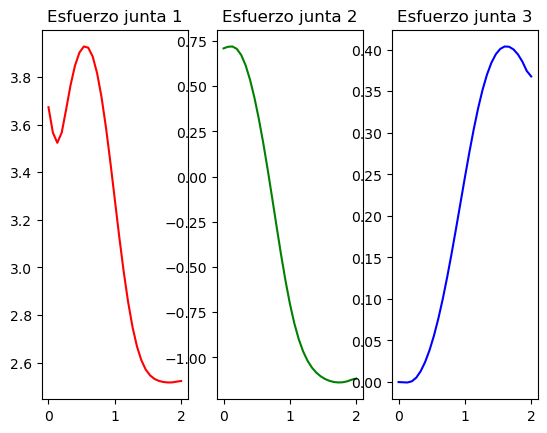

In [11]:
def main():
    generador_dinamica = GeneradorDinamica()
    generador_dinamica.cinematica_directa()
    generador_dinamica.generar_trayectoria()
    generador_dinamica.cinematica_inversa()
    #generador_dinamica.graficar()
    #generador_dinamica.graficar_ws()
    
    generador_dinamica.definir_inercia()
    generador_dinamica.calcular_velocidades()
    lagrangiano = generador_dinamica.calcular_lagrangiano()  # Guardar el resultado del Lagrangiano
    generador_dinamica.calcular_pares_en_juntas(lagrangiano)
    generador_dinamica.graficar_esfuerzos()

if __name__ == "__main__":
    main()

#### Al final las gráficas nos dan:

<img src="imagenes/esfuerzos.png" alt = "Robot RRR" width="900" height="900" display= "block"/>


### 4. Github
Para terminar, subir los archivos de la práctica al repositorio de github

## Análisis de resultados

¿Qué utilidad tiene el modelo de dinámica inversa de un robot?
> Como se pudo observar en la obtención de la gráfica de esfuerzos para las tres juntas, se aprecia como hay un cambio en la aplicación del par torsional conforme pasa el tiempo.
>
> De manera que, al tener y comparar las gráficas de velocidad y aceleración, se puede entender el porque se necesitan mayor par en la primera junta que en la tercera, ya que, al tener nuestra posición final del efector final con muy poco cambio, el par para el tercer eslabón es menor que los otros dos, siendo ambos los que con solo su propio movimiento es suficiente para mover el tercer eslabón en la posición deseada.

## Conclusiones

Al final se comprendió la importancia de obtener la dinamica inversa para poder determinar el par para cada junta de los eslabones, a través de haber obtenido los modelos de cinemática inversa y la trayectoria que sigue con solo tener la posición inicial y final del efector final.

Asimismo, para poder obtener el modelo de dinamica inversa se hizo uso del modelo Euler - Lagrange para analizar los esfuerzos en donde se incluyen los centros de masa y las masas de las juntas y de los eslabones, respectivamente.

Las gráficas de esfuerzos nos dan gran información de cada eslabón, más precisamente de sus juntas y del par necesario que ocupan para lograr el movimiento requerido para llegar al punto final del efector.

Al incluir esta práctica en un repositorio facilita tanto el avance que se hace para tener un orden, así como visualizar el seguimiento necesario para su correción o mejoramiento.
## Bibliografía 

En caso de usarse, se deben hacer referencia a la información implementada en formato ieee.


